# Install Libraries

In [1]:
!pip install folium
!pip install geopandas

DEPRECATION: Loading egg at /Users/fedijay/anaconda3/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.7 MB/s eta 0:00:00 0:00:01
DEPRECATION: Loading egg at /Users/fedijay/anaconda3/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


### Preprocessing

In [5]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Read in the data 
df = pd.read_csv("House_price_multifeatures.csv",low_memory=False) # low memeory where since there are some columns with undefined dtypes
df 

,Unnamed: 0,Id,PropertyLocationStreet1,PropertyLocationStreet2,PropertyCity,CountyFIPS,PropertyZip,OwnerName,OwnerMailAddress1,OwnerMailAddress2,...,HydrantLatitude,HydrantLongitude,LastSalePrice,LastSaleDate,Homestead,FloodzoneLastUpdatedDate,StateParcelId,AssesmentYear,Geometry,TTTerritory
0,0,120210f35317ca697,503 LAKE LOUISE CIR,19-201,NAPLES,21.0,34110,"BOLTZ, LARRY P & SANDRA A",3739 WRENS NEST BLVD,NaN,...,NaN,NaN,NaN,NaN,False,2017-05-12 00:00:00,C21-000-188-9852-8,2015.0,NaN,541-0
1,0,12086db272d757be6,5934 NW 7 PL,NaN,MIAMI,86.0,33127,LILIANE MORISSETTE,5934 NW 7 PL,NaN,...,25.83045,-80.21022,NaN,NaN,True,2017-12-08 00:00:00,C23-000-198-3578-4,2015.0,NaN,032-0
2,0,12057c35a22b0865c,5713 PALM RIVER RD,NaN,TAMPA,57.0,33619,PADRON LUIS A,5713 PALM RIVER RD,NaN,...,27.94326,-82.39026,NaN,NaN,True,2031-01-01 00:00:00,C39-000-406-3313-3,2015.0,NaN,080-0
3,0,12057cf31f8e69893,1805 MAGDALENE MANOR DR,NaN,TAMPA,57.0,33613,BELLO CELESTE M,1805 MAGDALENE MANOR DR,NaN,...,28.07439,-82.47757,NaN,NaN,True,2018-04-04 00:00:00,C39-000-389-2623-4,2015.0,NaN,080-0
4,0,12057c5b7712cfb0b,7405 ALAFIA RIDGE LP,NaN,RIVERVIEW,57.0,33569,LANE ROY JR,7405 ALAFIA RIDGE LOOP,NaN,...,27.87574,-82.29307,NaN,NaN,True,2031-01-01 00:00:00,C39-000-414-6909-9,2015.0,NaN,080-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81742,0,1200980de660f371c,1199 HOUSTON ST,NaN,MELBOURNE,9.0,32935,"HELLER, ARDYTH",1199 HOUSTON ST,NaN,...,NaN,NaN,NaN,NaN,True,2031-01-01 00:00:00,C15-001-090-5145-8,2015.0,NaN,064-0
81743,0,1200980de660f371c,1199 HOUSTON ST,NaN,MELBOURNE,9.0,32935,"HELLER, ARDYTH",1199 HOUSTON ST,NaN,...,NaN,NaN,NaN,NaN,True,2031-01-01 00:00:00,C15-001-090-5145-8,2015.0,NaN,064-0
81744,0,1208698914968668a,3715 HARLANO ST,NaN,CORAL GABLES,86.0,33134,MARITZA NAVARRO,3715 HARLANO ST,NaN,...,25.73712,-80.26428,735000.0,09/2016,True,2017-12-08 00:00:00,C23-000-211-7828-0,2015.0,NaN,034-0
81745,0,120117d9876b67325,714 N 32 AVE,NaN,HOLLYWOOD,11.0,33021,"CONNOLLY,MEAGHAN N",714 N 32 AVE,NaN,...,NaN,NaN,NaN,NaN,True,2017-06-20 00:00:00,C16-000-116-3292-4,2015.0,NaN,035-0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81747 entries, 0 to 81746
Data columns (total 96 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                81747 non-null  int64  
 1   Id                        81747 non-null  object 
 2   PropertyLocationStreet1   81747 non-null  object 
 3   PropertyLocationStreet2   3528 non-null   object 
 4   PropertyCity              81744 non-null  object 
 5   CountyFIPS                81739 non-null  float64
 6   PropertyZip               81747 non-null  int64  
 7   OwnerName                 81743 non-null  object 
 8   OwnerMailAddress1         81425 non-null  object 
 9   OwnerMailAddress2         3235 non-null   object 
 10  OwnerCity                 81435 non-null  object 
 11  OwnerState                81534 non-null  object 
 12  OwnerZip                  78231 non-null  object 
 13  CitizensTerritory         81671 non-null  float64
 14  Constr

In [8]:
df.describe()

,Unnamed: 0,CountyFIPS,PropertyZip,CitizensTerritory,NumberOfStories,NumberOfFamilies,YearBuilt,YearofRoof,AdjSquareFeet,Occupancy,...,SinkholeLongitude,SinkholeId,FloodZoneRiskLevel,EffectiveYearBuilt,NumberOfBusiness,HydrantLatitude,HydrantLongitude,LastSalePrice,AssesmentYear,Geometry
count,81747.0,81739.000000,81747.000000,81671.000000,32836.000000,1.0,81692.000000,6419.000000,81643.000000,0.0,...,81506.000000,81472.000000,0.0,81626.000000,5779.000000,36146.000000,36146.000000,1.182000e+04,81702.000000,0.0
mean,0.0,65.003976,33390.734816,175.467669,1.093662,1.0,1974.423346,2006.771148,1936.953811,NaN,...,-81.128713,2972.684493,NaN,1983.318232,1.191556,27.127115,-81.069140,2.107546e+05,2014.999755,NaN
std,0.0,40.804727,602.108660,237.905334,0.321324,NaN,17.044327,6.132341,854.067386,NaN,...,1.182114,1211.940134,NaN,14.833168,0.548914,1.250596,1.320678,3.827658e+05,0.067477,NaN
min,0.0,1.000000,32003.000000,5.000000,1.000000,1.0,1820.000000,1899.000000,1.000000,NaN,...,-86.645270,1.000000,NaN,1901.000000,1.000000,25.411190,-86.398640,1.000000e+02,2013.000000,NaN
25%,0.0,11.000000,33027.000000,37.000000,1.000000,1.0,1961.000000,2003.000000,1373.000000,NaN,...,-81.865260,1892.000000,NaN,1975.000000,1.000000,25.944040,-82.107065,7.300000e+04,2015.000000,NaN
50%,0.0,86.000000,33314.000000,46.000000,1.000000,1.0,1976.000000,2006.000000,1760.000000,NaN,...,-80.646440,2910.000000,NaN,1985.000000,1.000000,26.838490,-80.397360,1.600000e+05,2015.000000,NaN
75%,0.0,99.000000,33755.000000,90.000000,1.000000,1.0,1988.000000,2012.000000,2262.000000,NaN,...,-80.183290,4193.000000,NaN,1994.000000,1.000000,28.003448,-80.202290,2.650000e+05,2015.000000,NaN
max,0.0,131.000000,34997.000000,993.000000,6.000000,1.0,2018.000000,2019.000000,19998.000000,NaN,...,-80.058360,12797.000000,NaN,2018.000000,9.000000,30.797100,29.164440,1.737504e+07,2018.000000,NaN


In [9]:
df.isnull().sum()

Unnamed: 0                      0
Id                              0
PropertyLocationStreet1         0
PropertyLocationStreet2     78219
PropertyCity                    3
                            ...  
FloodzoneLastUpdatedDate       53
StateParcelId                 185
AssesmentYear                  45
Geometry                    81747
TTTerritory                   109
Length: 96, dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'Id', 'PropertyLocationStreet1',
       'PropertyLocationStreet2', 'PropertyCity', 'CountyFIPS', 'PropertyZip',
       'OwnerName', 'OwnerMailAddress1', 'OwnerMailAddress2', 'OwnerCity',
       'OwnerState', 'OwnerZip', 'CitizensTerritory', 'ConstructionType',
       'NumberOfStories', 'NumberOfFamilies', 'YearBuilt', 'YearofRoof',
       'YearofRoofVerified', 'RoofMaterial', 'AdjSquareFeet', 'Occupancy',
       'NumberOfMonthsUnoccupied', 'PPC', 'BCEG', 'TypeOfResidence',
       'FloorOfResidence', 'FloridaWindpool', 'DistancetoCoast',
       'DistancetoSinkhole', 'DistancetoHydrant', 'DistancetoFireDepartment',
       'FireDistrict', 'RespondingFireDepartment', 'CentralStationAlarm',
       'AutomaticSprinklers', 'NumberOfClaims', 'LocationWindSpeed',
       'DesignWindSpeed', 'InternalPressureDesign', 'WindborneDebrisRegion',
       'Terrain', 'RoofDeckAttachment', 'RoofCover', 'RooftoWallconnection',
       'SecondaryWaterResistance', 'OpeningProtection', 'Roof

# Exploratory Data Analysis

### Missing Value Analysis

                      Column  Number of Missing Values  Percentage
0                  Occupancy                     81747  100.000000
1   NumberOfMonthsUnoccupied                     81747  100.000000
2        CentralStationAlarm                     81747  100.000000
3        AutomaticSprinklers                     81747  100.000000
4             NumberOfClaims                     81747  100.000000
5            DesignWindSpeed                     81747  100.000000
6     InternalPressureDesign                     81747  100.000000
7         RoofDeckAttachment                     81747  100.000000
8                  RoofCover                     81747  100.000000
9       RooftoWallconnection                     81747  100.000000
10  SecondaryWaterResistance                     81747  100.000000
11         OpeningProtection                     81747  100.000000
12          NoPriorInsurance                     81747  100.000000
13                 Condemned                     81747  100.00

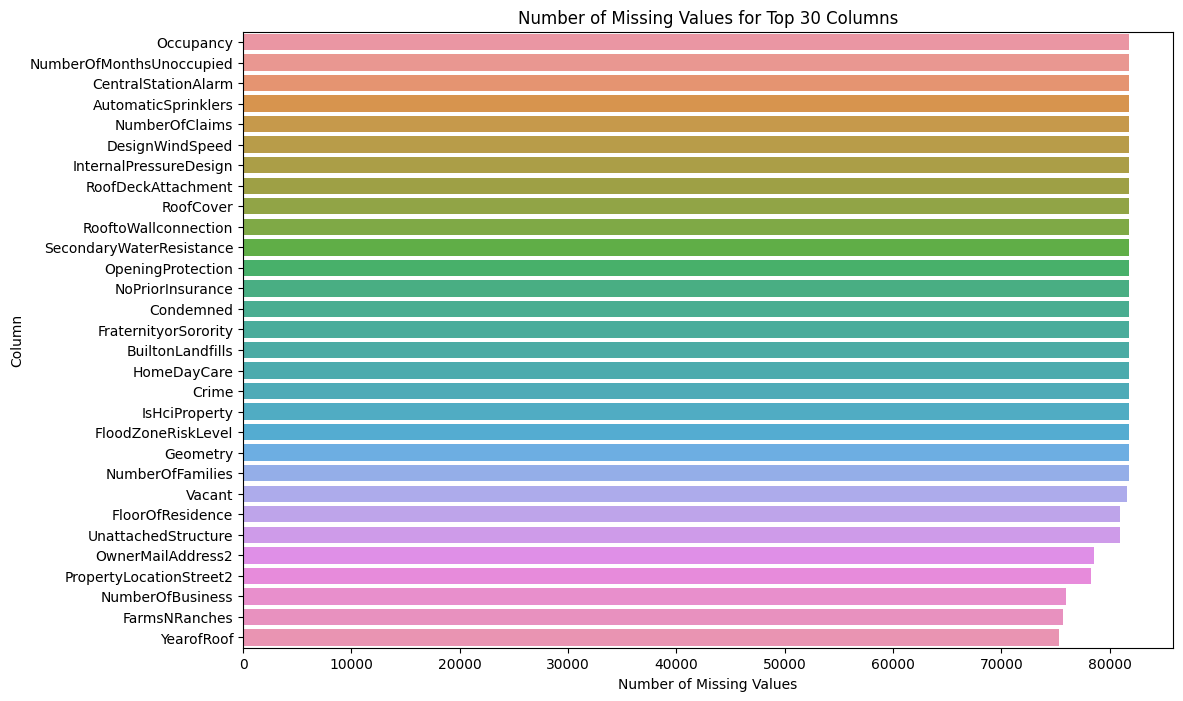

In [11]:

# Initialize an empty list to store the results
missing_values = []

# Iterate over all the columns in the dataset
for column in df.columns:
    num_missing = df[column].isnull().sum()
    if num_missing > 0:  # Consider only columns with missing values
        missing_values.append((column, num_missing))

# Sort the list of results in descending order of the number of missing values
missing_values.sort(key=lambda x: x[1], reverse=True)

# Create a dataframe for the 30 columns with the highest number of missing values
missing_values_df = pd.DataFrame(missing_values[:30], columns=['Column', 'Number of Missing Values'])
missing_values_df['Percentage'] = (missing_values_df['Number of Missing Values'] / len(df)) * 100

# Print the percentage of missing values
print(missing_values_df)

# Create a bar plot of the number of missing values for the 30 columns with the highest number of missing values
plt.figure(figsize=(12, 8))
sns.barplot(data=missing_values_df, x='Number of Missing Values', y='Column')
plt.title('Number of Missing Values for Top 30 Columns')
plt.show()


### Outliers Analysis

                      Column  Number of Outliers  Percentage
0          CitizensTerritory               19528   23.888338
1            DistancetoCoast               16876   20.644183
2         DistancetoSinkhole                8753   10.707427
3                 ParcelSize                6452    7.892644
4                ValueofHome                5753    7.037567
5              AdjSquareFeet                3630    4.440530
6            NumberOfStories                2797    3.421532
7          NumberOfBuildings                2680    3.278408
8   DistancetoFireDepartment                2575    3.149963
9          DistancetoHydrant                2250    2.752395
10             NumberOfUnits                2048    2.505291
11               PropertyZip                1715    2.097936
12         SinkholeLongitude                1421    1.738290
13      FireStationLongitude                1402    1.715048
14         CentroidLongitude                1399    1.711378
15            CoastLongi

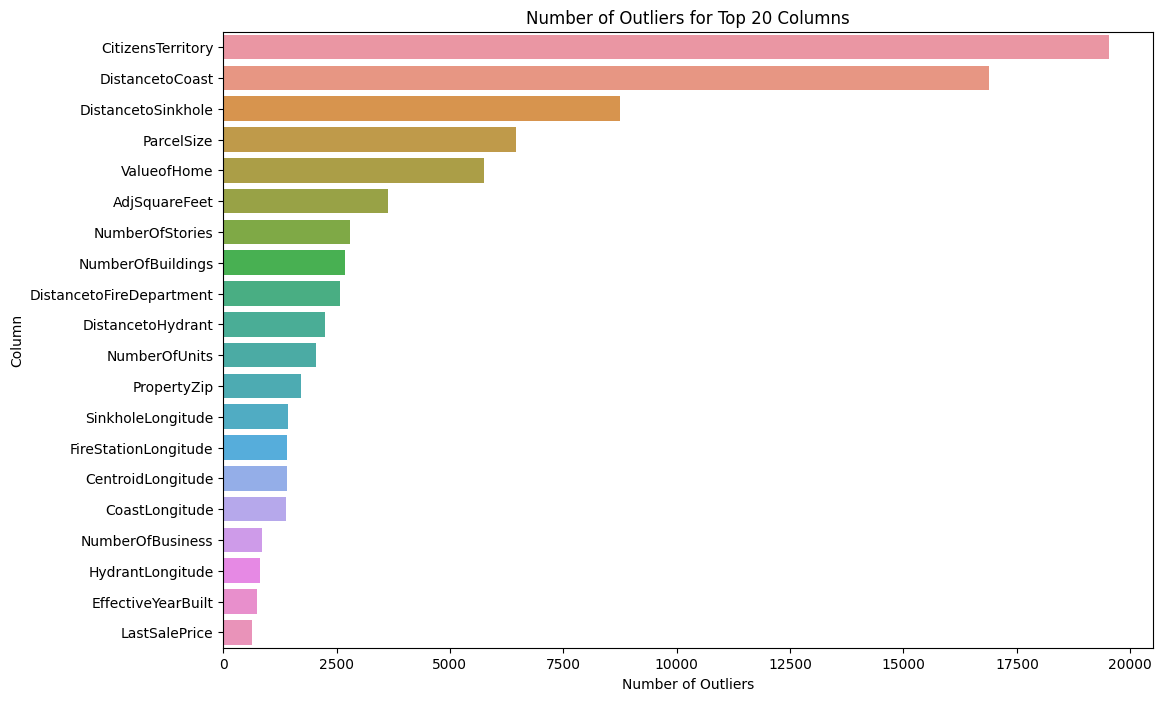

In [12]:
# Initialize an empty list to store the results
outliers = []

# Iterate over only numeric columns in the dataset
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
    num_outliers = df[outlier_condition].shape[0]
    if num_outliers > 0:  # Consider only columns with outliers
        outliers.append((column, num_outliers))

# Sort the list of results in descending order of the number of outliers
outliers.sort(key=lambda x: x[1], reverse=True)

# Create a dataframe for the 20 columns with the highest number of outliers
outliers_df = pd.DataFrame(outliers[:20], columns=['Column', 'Number of Outliers'])
outliers_df['Percentage'] = (outliers_df['Number of Outliers'] / len(df)) * 100

# Print the percentage of outliers
print(outliers_df)

# Create a bar plot of the number of outliers for the 20 columns with the highest number of outliers
plt.figure(figsize=(12, 8))
sns.barplot(data=outliers_df, x='Number of Outliers', y='Column')
plt.title('Number of Outliers for Top 20 Columns')
plt.show()


### Distribution of Numerical Features

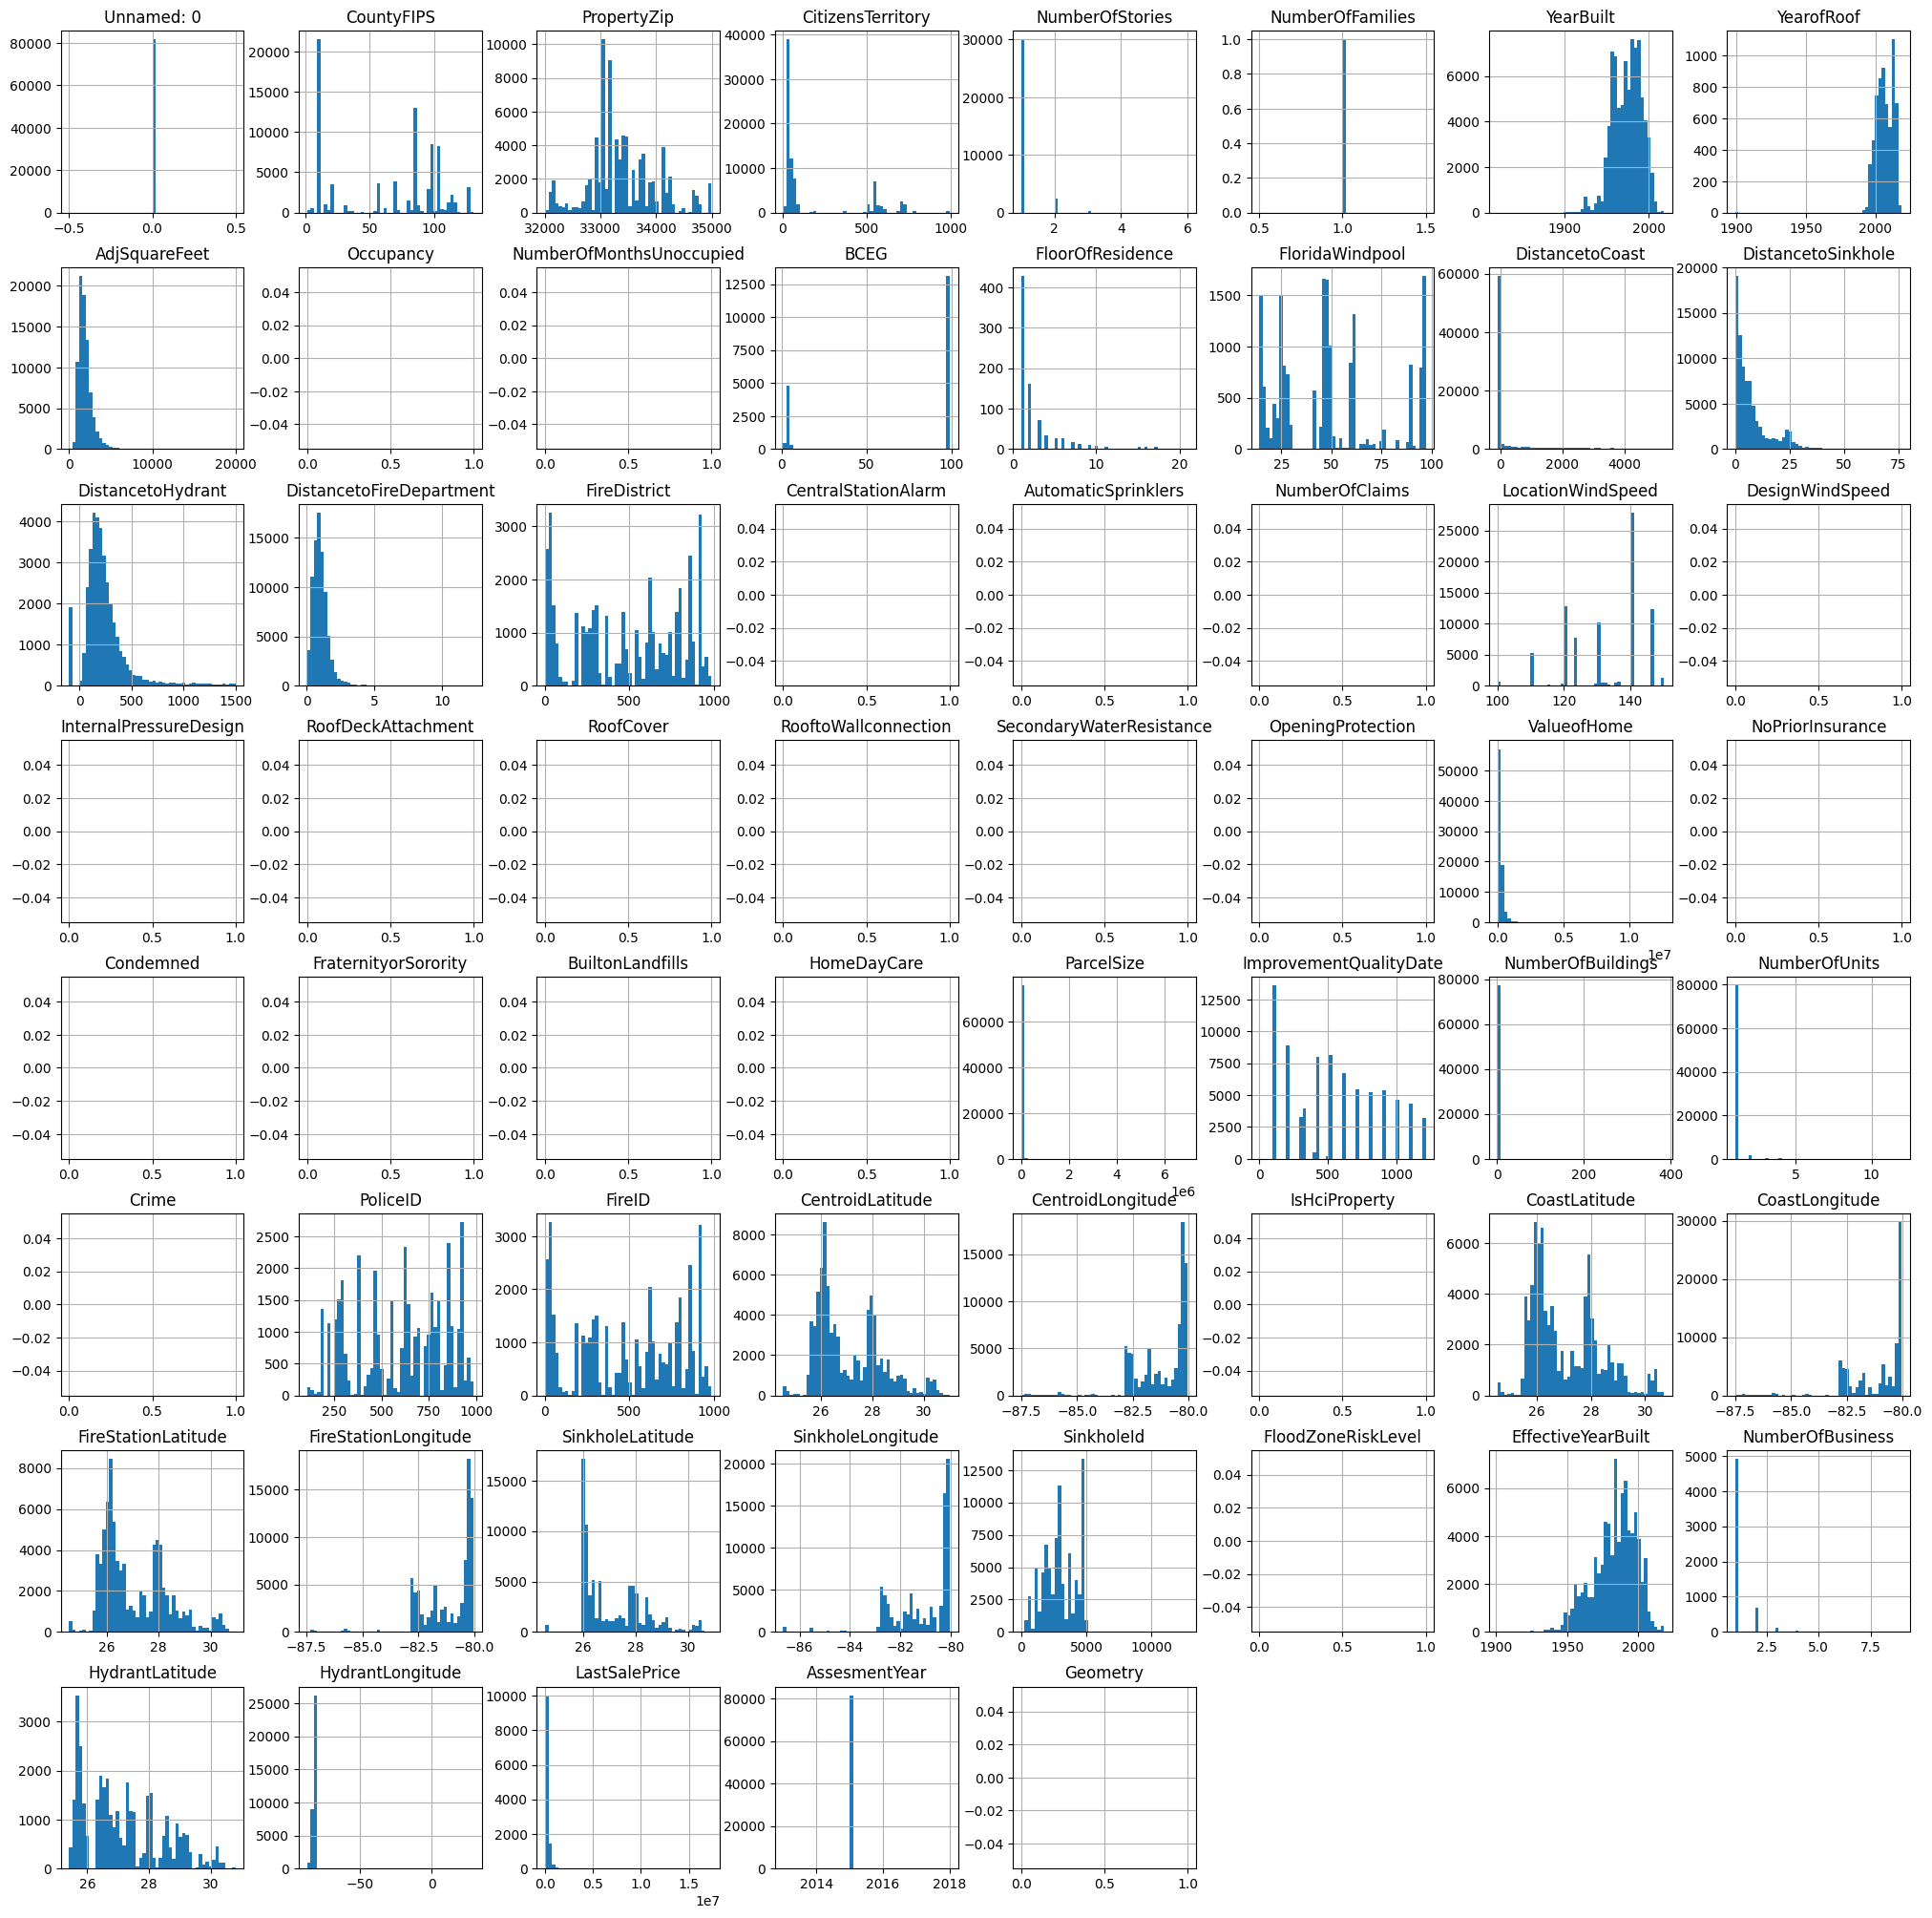

In [13]:
# Histograms for features
df.hist(bins=50, figsize=(25,25))
plt.show()


<Axes: xlabel='ConstructionType', ylabel='count'>

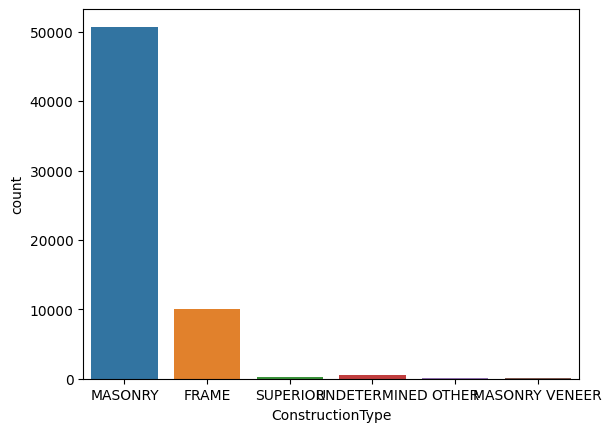

In [14]:
# bar chart
sns.countplot(data=df, x="ConstructionType")

### Bivariate Analysis

<Axes: xlabel='YearBuilt', ylabel='ValueofHome'>

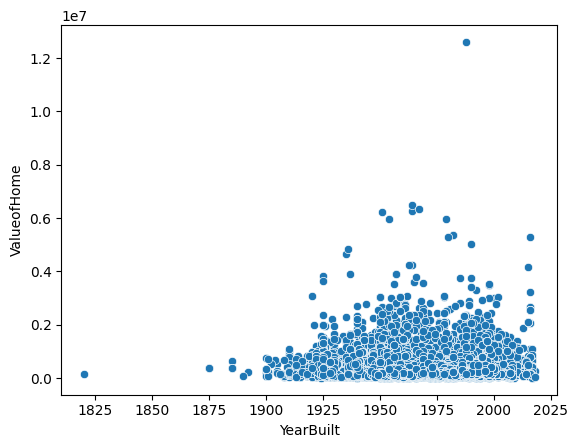

In [15]:
# Scatter plot 
sns.scatterplot(data=df, x='YearBuilt', y='ValueofHome')


<Axes: xlabel='ValueofHome', ylabel='TypeOfResidence'>

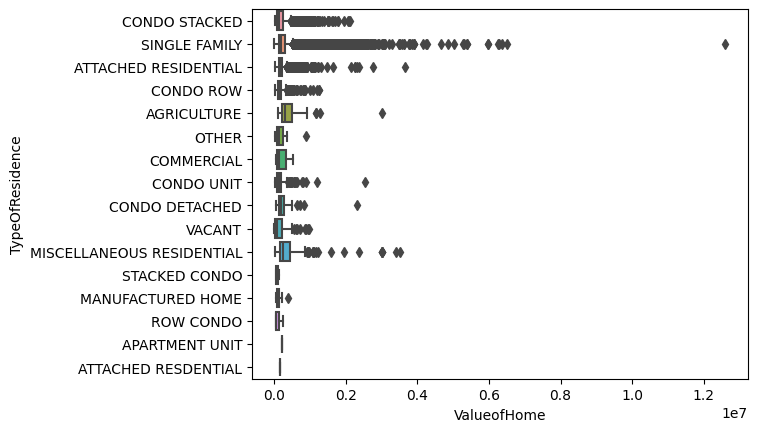

In [16]:
#Box plot
sns.boxplot(data=df, x='ValueofHome', y='TypeOfResidence')


### Multivariate Analysis

ValueofHome           1.000000
AdjSquareFeet         0.536919
LastSalePrice         0.351393
NumberOfStories       0.218556
ParcelSize            0.066214
NumberOfUnits         0.052812
DistancetoCoast       0.034565
YearBuilt             0.018746
NumberOfClaims             NaN
DesignWindSpeed            NaN
FloodZoneRiskLevel         NaN
NumberOfFamilies           NaN
Name: ValueofHome, dtype: float64


/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


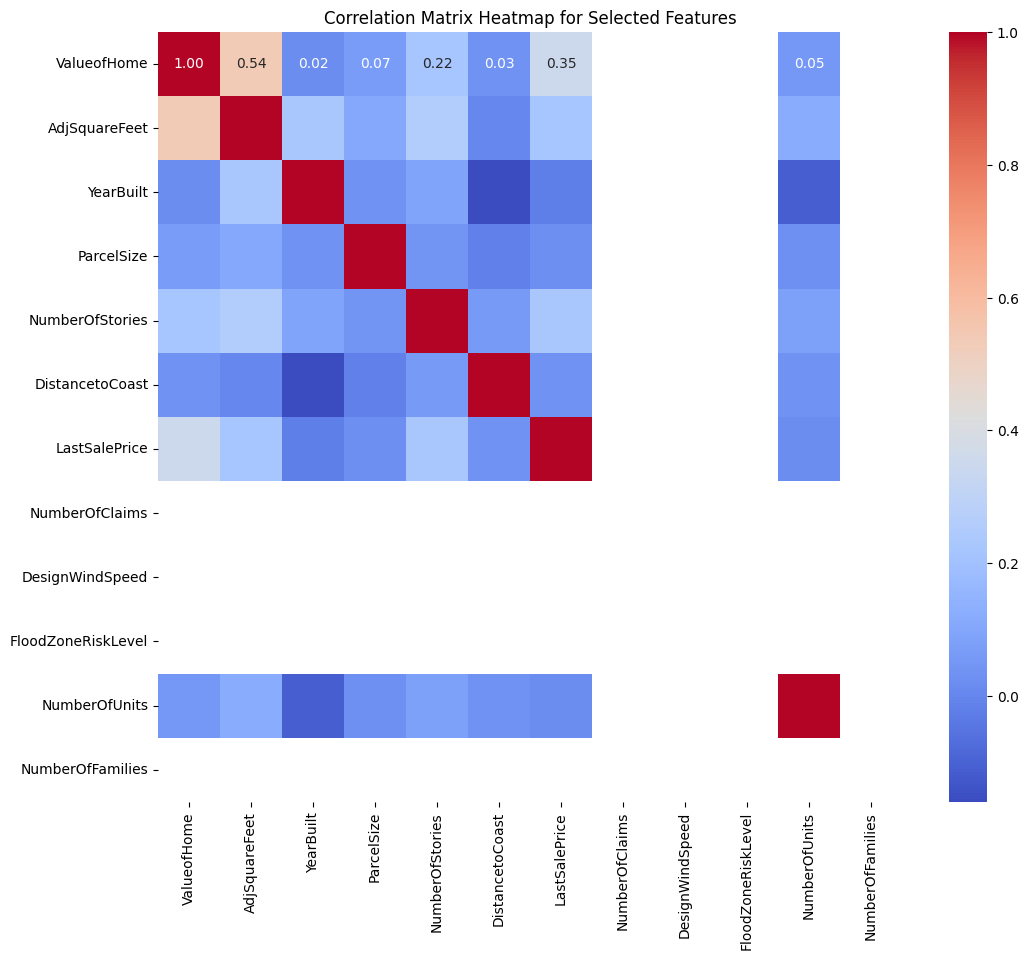

In [17]:
# List of selected columns to include in the correlation analysis
selected_columns = [
    'ValueofHome', 'AdjSquareFeet', 'YearBuilt', 'ParcelSize', 'NumberOfStories', 
    'DistancetoCoast', 'LastSalePrice', 'NumberOfClaims', 'DesignWindSpeed', 
    'FloodZoneRiskLevel', 'NumberOfUnits', 'NumberOfFamilies'
]

# Ensure all selected columns are in the dataframe
selected_columns = [col for col in selected_columns if col in df.columns]

# Select only the selected numerical columns
numerical_df = df[selected_columns]

# Compute the correlation matrix for the selected columns
corr_matrix = numerical_df.corr()

# Print the correlation matrix sorted for the 'ValueofHome' column
if 'ValueofHome' in corr_matrix:
    print(corr_matrix['ValueofHome'].sort_values(ascending=False))

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # size of plot
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Selected Features')
plt.show()


/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

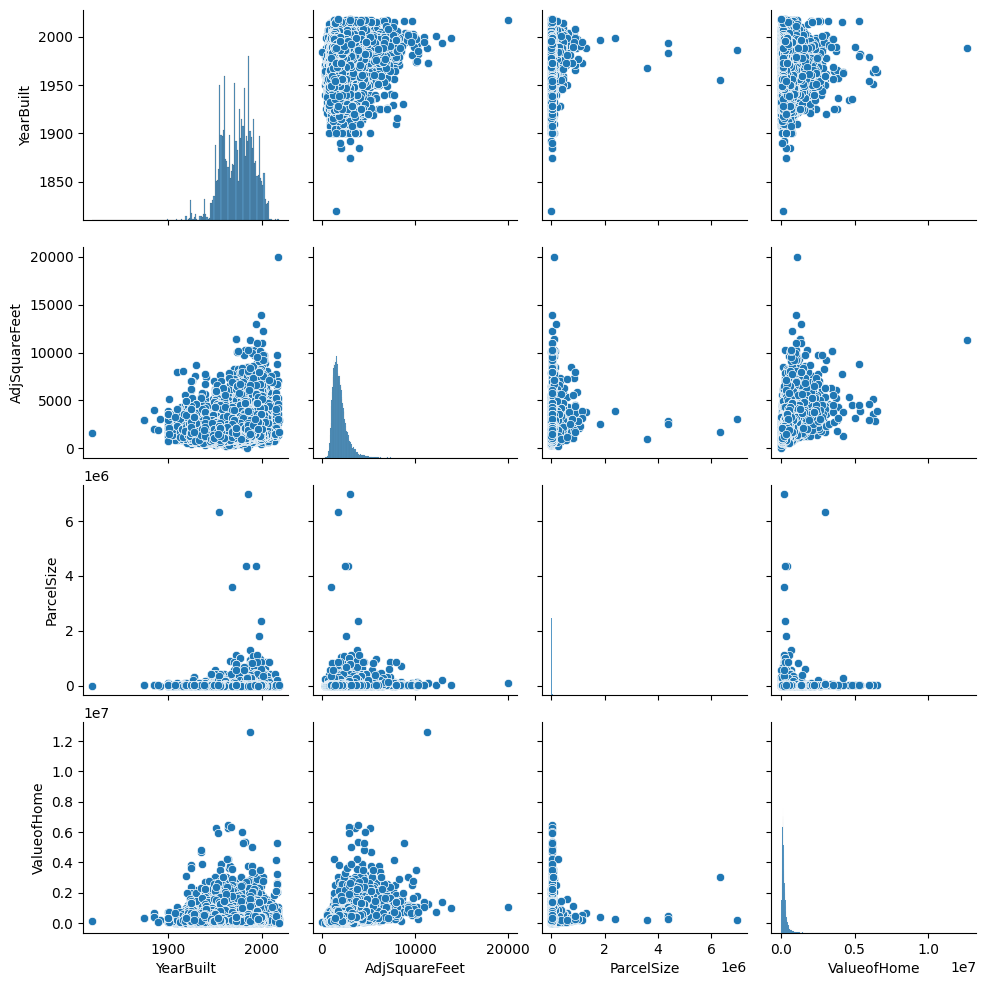

In [18]:
#Pair plot 
sns.pairplot(data=df, vars=['YearBuilt', 'AdjSquareFeet', 'ParcelSize', 'ValueofHome'])


### Geospatial Analysis


In [19]:
import folium

# Create a map centered at the mean latitude and longitude of the dataset
map = folium.Map(location=[df['CentroidLatitude'].mean(), df['CentroidLongitude'].mean()])

# Display the map
map


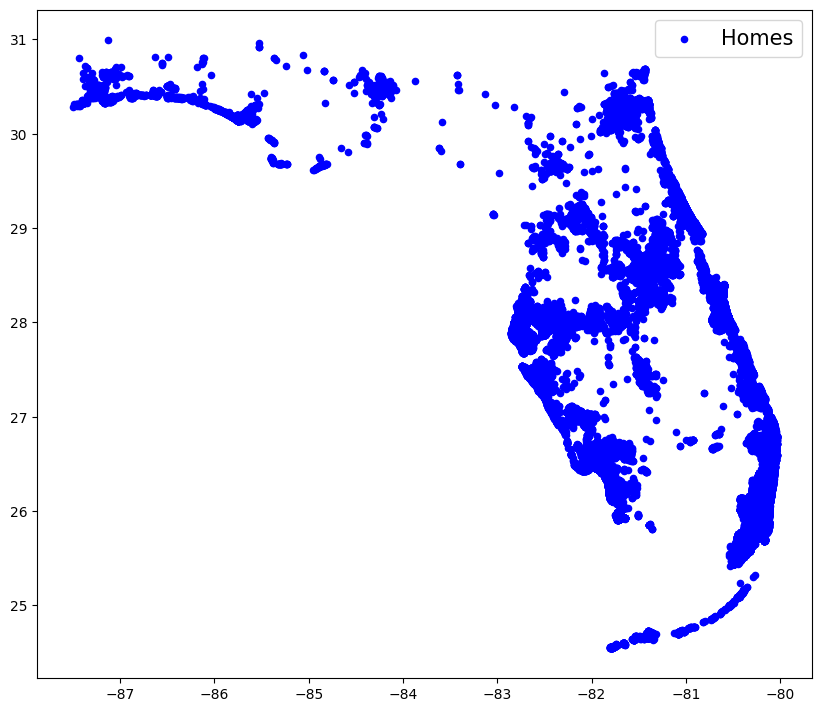

In [20]:
import geopandas as gpd
from shapely.geometry import Point

# Creating a GeoDataFrame for latitude and longitude
geometry = [Point(xy) for xy in zip(df['CentroidLongitude'], df['CentroidLatitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(10,10))
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Homes')
plt.legend(prop={'size': 15})


### Temporal Analysis

/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YearBuilt', ylabel='ValueofHome'>

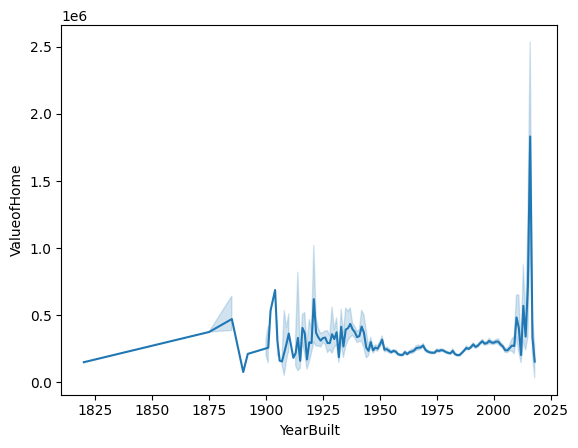

In [21]:
#Line plot
sns.lineplot(data=df, x='YearBuilt', y='ValueofHome')


/var/folders/ng/md9c_wvx4xzc7zq_f4lwnyhr0000gn/T/ipykernel_37346/4118240877.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastSaleDate'] = pd.to_datetime(df['LastSaleDate'])


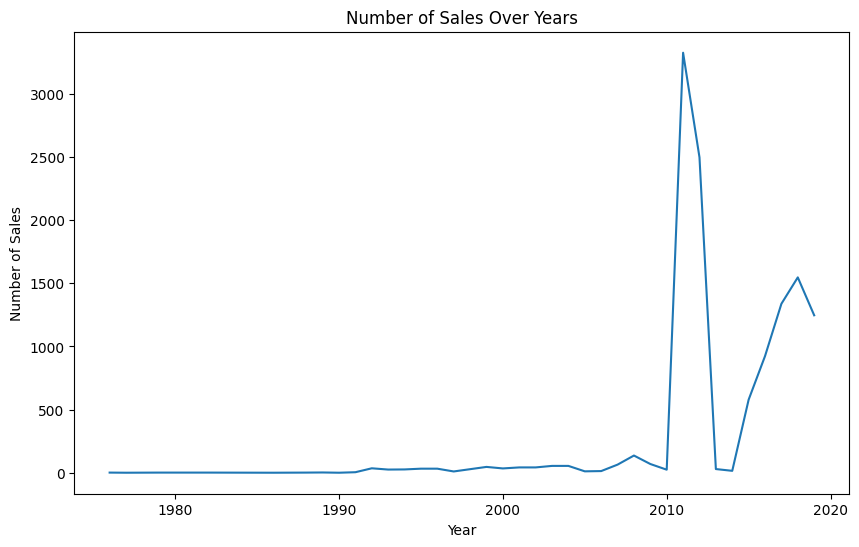

In [22]:
# Convert dates to datetime format
df['LastSaleDate'] = pd.to_datetime(df['LastSaleDate'])

# Time series plot
plt.figure(figsize=(10,6))
df.groupby(df['LastSaleDate'].dt.year)['LastSaleDate'].count().plot(kind='line')
plt.title('Number of Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()


# Feature Engineering

In [23]:
# Initialize an empty list to store the results
missing_values = []

# Iterate over all the columns in the dataset
for column in df.columns:
    num_missing = df[column].isnull().sum()
    percentage_missing = (num_missing / len(df)) * 100
    if percentage_missing > 40:  # Consider only columns with more than 40% missing values
        missing_values.append((column, num_missing, percentage_missing))

# Sort the list of results in descending order of the percentage of missing values
missing_values.sort(key=lambda x: x[2], reverse=True)

# Create a dataframe for the columns with more than 50% missing values
missing_values_df = pd.DataFrame(missing_values, columns=['Column', 'Number of Missing Values', 'Percentage'])

# Print the number of missing values and the percentage of missing values
print("Columns with more than 40% missing values:")
print(missing_values_df)


Columns with more than 40% missing values:
                      Column  Number of Missing Values  Percentage
0                  Occupancy                     81747  100.000000
1   NumberOfMonthsUnoccupied                     81747  100.000000
2        CentralStationAlarm                     81747  100.000000
3        AutomaticSprinklers                     81747  100.000000
4             NumberOfClaims                     81747  100.000000
5            DesignWindSpeed                     81747  100.000000
6     InternalPressureDesign                     81747  100.000000
7         RoofDeckAttachment                     81747  100.000000
8                  RoofCover                     81747  100.000000
9       RooftoWallconnection                     81747  100.000000
10  SecondaryWaterResistance                     81747  100.000000
11         OpeningProtection                     81747  100.000000
12          NoPriorInsurance                     81747  100.000000
13                 

In [24]:
df.shape

(81747, 96)

### Creating new dataframe and removing columns that have more than 40% percent missing values

In [25]:
# Get the list of columns to drop (those with more than 40% missing values)
columns_to_drop = missing_values_df['Column'].tolist()

# Drop these columns from the original DataFrame
new_df = df.drop(columns=columns_to_drop)

# Print the shape of the new DataFrame to confirm the columns have been dropped
print("Shape of the original DataFrame:", df.shape)
print("Shape of the new DataFrame after dropping columns:", new_df.shape)

# Display the first few rows of the new DataFrame
new_df.head()


Shape of the original DataFrame: (81747, 96)
Shape of the new DataFrame after dropping columns: (81747, 50)


,Unnamed: 0,Id,PropertyLocationStreet1,PropertyCity,CountyFIPS,PropertyZip,OwnerName,OwnerMailAddress1,OwnerCity,OwnerState,...,SinkholeLatitude,SinkholeLongitude,SinkholeId,SinkholeAddress,EffectiveYearBuilt,Homestead,FloodzoneLastUpdatedDate,StateParcelId,AssesmentYear,TTTerritory
0,0,120210f35317ca697,503 LAKE LOUISE CIR,NAPLES,21.0,34110,"BOLTZ, LARRY P & SANDRA A",3739 WRENS NEST BLVD,MAUMEE,OH,...,NaN,NaN,NaN,NaN,1988.0,False,2017-05-12 00:00:00,C21-000-188-9852-8,2015.0,541-0
1,0,12086db272d757be6,5934 NW 7 PL,MIAMI,86.0,33127,LILIANE MORISSETTE,5934 NW 7 PL,MIAMI,FL,...,25.96256,-80.16641,2783.0,NaN,2004.0,True,2017-12-08 00:00:00,C23-000-198-3578-4,2015.0,032-0
2,0,12057c35a22b0865c,5713 PALM RIVER RD,TAMPA,57.0,33619,PADRON LUIS A,5713 PALM RIVER RD,TAMPA,FL,...,27.94389,-82.37694,468.0,"BRANDON Z-33 505 PAPAYA DRIVE TAMPA, FL 33619",2010.0,True,2031-01-01 00:00:00,C39-000-406-3313-3,2015.0,080-0
3,0,12057cf31f8e69893,1805 MAGDALENE MANOR DR,TAMPA,57.0,33613,BELLO CELESTE M,1805 MAGDALENE MANOR DR,TAMPA,FL,...,28.08028,-82.47806,323.0,"SULPHUR SPRINGS Y-32, FL",2006.0,True,2018-04-04 00:00:00,C39-000-389-2623-4,2015.0,080-0
4,0,12057c5b7712cfb0b,7405 ALAFIA RIDGE LP,RIVERVIEW,57.0,33569,LANE ROY JR,7405 ALAFIA RIDGE LOOP,RIVERVIEW,FL,...,27.89053,-82.29201,1920.0,"610 HITCHING POST DR BRANDON, FL, 33511",2002.0,True,2031-01-01 00:00:00,C39-000-414-6909-9,2015.0,080-0


In [26]:
new_df.columns

Index(['Unnamed: 0', 'Id', 'PropertyLocationStreet1', 'PropertyCity',
       'CountyFIPS', 'PropertyZip', 'OwnerName', 'OwnerMailAddress1',
       'OwnerCity', 'OwnerState', 'OwnerZip', 'CitizensTerritory',
       'ConstructionType', 'YearBuilt', 'YearofRoofVerified', 'AdjSquareFeet',
       'PPC', 'TypeOfResidence', 'DistancetoCoast', 'DistancetoSinkhole',
       'DistancetoFireDepartment', 'RespondingFireDepartment',
       'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'ValueofHome',
       'FloodZone', 'ParcelSize', 'ImprovementQuality',
       'ImprovementQualityDate', 'NumberOfBuildings', 'NumberOfUnits',
       'CountyName', 'PropertyState', 'CentroidLatitude', 'CentroidLongitude',
       'CoastLatitude', 'CoastLongitude', 'FireStationLatitude',
       'FireStationLongitude', 'SinkholeLatitude', 'SinkholeLongitude',
       'SinkholeId', 'SinkholeAddress', 'EffectiveYearBuilt', 'Homestead',
       'FloodzoneLastUpdatedDate', 'StateParcelId', 'AssesmentYear',
       'TTT

### Specific Reasons for Dropping Each Column:
    
'Unnamed: 0', 'Id': Often serve as arbitrary indices or identifiers that do not carry meaningful information for analysis.

'OwnerName', 'OwnerMailAddress1': Personal information that is irrelevant to property value analysis and raises privacy issues.

'PropertyLocationStreet1', 'OwnerCity', 'OwnerState', 'OwnerZip', 'PropertyCity', 'PropertyZip': Highly specific location details that are less useful when analyzing property trends across larger geographic areas.

'CitizensTerritory', 'SinkholeId', 'SinkholeAddress', 'StateParcelId': Specific identifiers that are typically irrelevant for broad market analysis or predictive modeling.

'CoastLatitude', 'Coecis'Longitude', 'FireStationLatitude', 'FireStationLongitude', 'SinkholeLatitude', 'SinkholeLongitude': Very detailed geospatial data that may only be necessary for specific environmental or risk-related studies, not general property valuation.

'PropertyState': Redundant if the analysis covers a specific state or if state-level differences are not central to the analysis.

'CentroidLatitude', 'CentroidLongitude': While useful for mapping, they might not be necessary if geographic specificity at this level is not required for the analysis.


In [27]:
        
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0', 'Id', 'OwnerName', 'OwnerMailAddress1', 'PropertyLocationStreet1', 'OwnerCity',
    'OwnerState', 'OwnerZip', 'PropertyCity','CitizensTerritory', 'SinkholeId','SinkholeAddress', 'StateParcelId','CoastLatitude', 'CoastLongitude',
    'FireStationLatitude', 'FireStationLongitude', 'SinkholeLatitude', 
    'SinkholeLongitude','PropertyZip','PropertyState','CentroidLatitude', 'CentroidLongitude'
]

# Drop these columns from the DataFrame
new_df = new_df.drop(columns=columns_to_drop, errors='ignore')  # using errors='ignore' to avoid errors if a column does not exist

# Display the remaining columns to confirm
print("Updated columns:", new_df.columns.tolist())
print("DataFrame shape:", new_df.shape)


Updated columns: ['CountyFIPS', 'ConstructionType', 'YearBuilt', 'YearofRoofVerified', 'AdjSquareFeet', 'PPC', 'TypeOfResidence', 'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment', 'RespondingFireDepartment', 'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'ValueofHome', 'FloodZone', 'ParcelSize', 'ImprovementQuality', 'ImprovementQualityDate', 'NumberOfBuildings', 'NumberOfUnits', 'CountyName', 'EffectiveYearBuilt', 'Homestead', 'FloodzoneLastUpdatedDate', 'AssesmentYear', 'TTTerritory']
DataFrame shape: (81747, 27)


In [28]:
#Age of the house
from datetime import datetime

new_df['Age'] = datetime.now().year - new_df['YearBuilt']

In [29]:
# Counting numerical and categorical columns
numerical_cols = new_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = new_df.select_dtypes(include=['object']).columns

print("Number of numerical columns:", len(numerical_cols))
print("Number of categorical columns:", len(categorical_cols))


Number of numerical columns: 15
Number of categorical columns: 13


/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


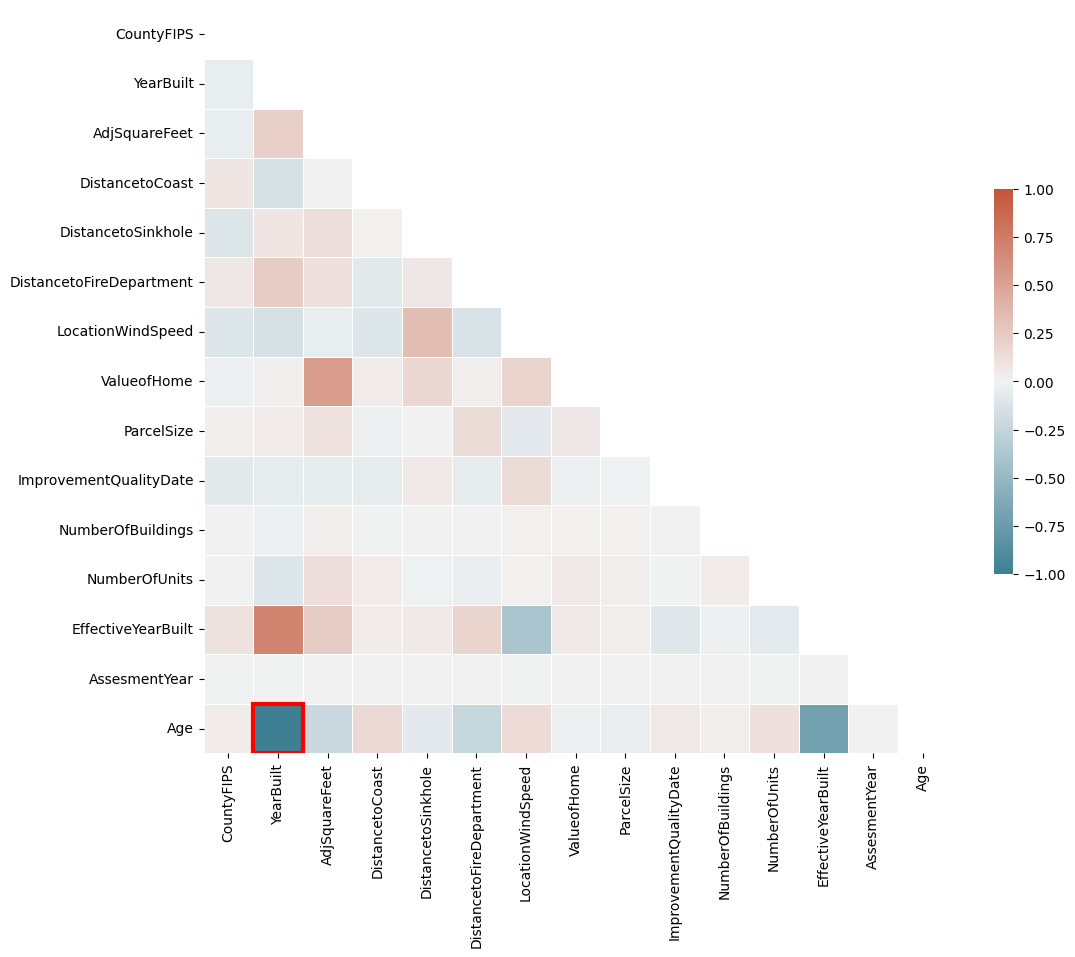

In [30]:
# Calculating correlation matrix among numerical columns of new_df
corr_matrix = new_df[numerical_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
            fmt=".2f")

# Highlighting highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.75 or corr_matrix.iloc[i, j] < -0.75:  # strong correlation threshold
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3))

plt.show()


In [31]:
# Columns related to the years being removed
columns_to_remove = ['CountyFIPS','YearBuilt', 'EffectiveYearBuilt', 'AssesmentYear', 'ImprovementQualityDate']

# Dropping the columns
new_df = new_df.drop(columns=columns_to_remove, errors='ignore')

# Verify the changes
print("Updated DataFrame columns:", new_df.columns.tolist())
print("DataFrame shape:", new_df.shape)


Updated DataFrame columns: ['ConstructionType', 'YearofRoofVerified', 'AdjSquareFeet', 'PPC', 'TypeOfResidence', 'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment', 'RespondingFireDepartment', 'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'ValueofHome', 'FloodZone', 'ParcelSize', 'ImprovementQuality', 'NumberOfBuildings', 'NumberOfUnits', 'CountyName', 'Homestead', 'FloodzoneLastUpdatedDate', 'TTTerritory', 'Age']
DataFrame shape: (81747, 23)


In [32]:
categorical_cols = new_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)
print(len(categorical_cols))


Categorical columns: Index(['ConstructionType', 'YearofRoofVerified', 'PPC', 'TypeOfResidence',
       'RespondingFireDepartment', 'WindborneDebrisRegion', 'Terrain',
       'FloodZone', 'ImprovementQuality', 'CountyName', 'Homestead',
       'FloodzoneLastUpdatedDate', 'TTTerritory'],
      dtype='object')
13


In [33]:
# Analyzing unique values 
for col in categorical_cols:
    unique_values = new_df[col].nunique()
    print(f"{col} has {unique_values} unique values.")


ConstructionType has 6 unique values.
YearofRoofVerified has 2 unique values.
PPC has 20 unique values.
TypeOfResidence has 16 unique values.
RespondingFireDepartment has 1503 unique values.
WindborneDebrisRegion has 2 unique values.
Terrain has 3 unique values.
FloodZone has 172 unique values.
ImprovementQuality has 6 unique values.
CountyName has 61 unique values.
Homestead has 2 unique values.
FloodzoneLastUpdatedDate has 148 unique values.
TTTerritory has 152 unique values.


In [34]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(new_df[col].value_counts().head())



Value counts for ConstructionType:
ConstructionType
MASONRY           50718
FRAME              9995
UNDETERMINED        576
SUPERIOR            256
MASONRY VENEER       78
Name: count, dtype: int64

Value counts for YearofRoofVerified:
YearofRoofVerified
False    78973
True      2666
Name: count, dtype: int64

Value counts for PPC:
PPC
4    16407
3    14428
2    11560
1    11144
5     2623
Name: count, dtype: int64

Value counts for TypeOfResidence:
TypeOfResidence
SINGLE FAMILY           68585
ATTACHED RESIDENTIAL     5413
CONDO STACKED            5368
CONDO ROW                1162
CONDO UNIT                588
Name: count, dtype: int64

Value counts for RespondingFireDepartment:
RespondingFireDepartment
MIRAMAR FIRE DEPARTMENT AND RESCUE STATION 19                          673
MARCO ISLAND FIRE DEPARTMENT AND RESCUE STATION 50                     661
BROWARD COUNTY FIRE DEPARTMENT AND RESCUE STATION 37                   502
MIAMI-DADE COUNTY FIRE DEPARTMENT AND RESCUE STATION 4 (COR

### Explanation for Dropping Specific Categorical Columns:

YearofRoofVerified:
    Limited Impact: Whether the roof's year was verified may not significantly influence the overall property value compared to factors like the roof's condition or age.
    
PPC (Public Protection Classification):
    Niche Relevance: While important for insurance purposes, the PPC might not universally affect property value unless the analysis specifically focuses on insurance premiums or fire protection quality.
    
TypeOfResidence:
    Possible Overlap: The type of residence can be significant but may overlap with data already captured in "ConstructionType" and other structural features of the home that are more directly linked to construction quality and style.

RespondingFireDepartment:
    High Cardinality and Limited Direct Impact: The specific fire department, while important for emergency services, likely has a minimal direct impact on property valuation unless linked to response times or local infrastructure quality.
    
WindborneDebrisRegion:
    Binary or Low Variance: Often this is a binary indicator that might not add significant variance to the model, especially if most properties fall within the same category.
    
FloodZone:
    High Cardinality and Specific Usage: Requires detailed analysis that might be more relevant to insurance costing rather than general property valuation, especially if the dataset spans multiple regions with different flood risk profiles.
    
ImprovementQuality:
    Subjective and Potentially Redundant: Quality of improvements might overlap with "ConstructionType" which also indicates the overall build and durability of the structure.
    
CountyName:
    Geographic Redundancy: If the analysis is not region-specific or if demographic and geographical influences are captured through other variables, the specific county might not be necessary.
    
Homestead:
    Specific Tax Implication: Indicates a tax status which may not universally affect the market value, especially in a diverse dataset where tax implications can vary widely.
    
FloodzoneLastUpdatedDate:
    Temporal Specificity Without Direct Relevance: The update date of flood zone information is more relevant for temporal analysis specific to risk assessment rather than ongoing property valuation.
    
TTTerritory:
    High Cardinality and Limited Relevance: Similar to RespondingFireDepartment, the territory for rating or insurance might not be directly relevant to property value outside of specific insurance cost calculations.

In [35]:
# List of categorical columns to keep
columns_to_keep = ['Terrain', 'ConstructionDate']

# List of all other categorical columns to drop
columns_to_drop = [col for col in categorical_cols if col not in columns_to_keep]

# Dropping the columns
new_df = new_df.drop(columns=columns_to_drop, errors='ignore')

# Print the updated DataFrame to confirm removal
print("Updated DataFrame columns:", new_df.columns.tolist())
print("DataFrame shape:", new_df.shape)


Updated DataFrame columns: ['AdjSquareFeet', 'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment', 'LocationWindSpeed', 'Terrain', 'ValueofHome', 'ParcelSize', 'NumberOfBuildings', 'NumberOfUnits', 'Age']
DataFrame shape: (81747, 11)


               ParcelSize  AdjSquareFeet  ValueofHome
ParcelSize       1.000000       0.107098     0.066214
AdjSquareFeet    0.107098       1.000000     0.536919
ValueofHome      0.066214       0.536919     1.000000


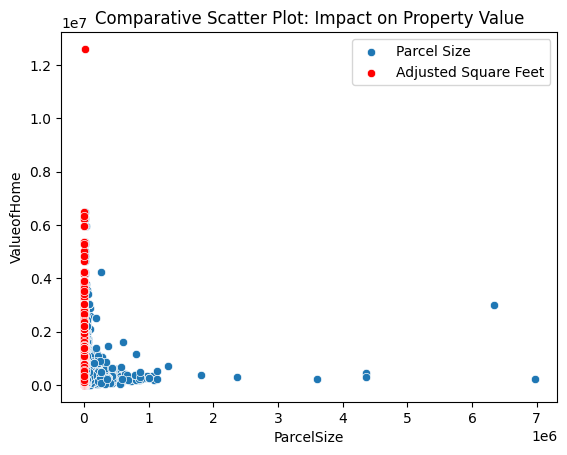

In [36]:

# Correlation matrix for ParcelSize, AdjSquareFeet, and ValueofHome
print(new_df[['ParcelSize', 'AdjSquareFeet', 'ValueofHome']].corr())

# Scatter plot to visualize the relationship
sns.scatterplot(data=new_df, x='ParcelSize', y='ValueofHome', label='Parcel Size')
sns.scatterplot(data=new_df, x='AdjSquareFeet', y='ValueofHome', color='red', label='Adjusted Square Feet')
plt.legend()
plt.title('Comparative Scatter Plot: Impact on Property Value')
plt.show()


### Correlation Analysis Interpretation:

ParcelSize vs. ValueofHome: The correlation coefficient of approximately 0.066 indicates a very weak linear relationship between the size of the parcel and the value of the home. This suggests that the overall land size has little direct impact on the property value in your dataset.

AdjSquareFeet vs. ValueofHome: A correlation coefficient of approximately 0.537 suggests a moderate positive linear relationship. This indicates that the interior square footage (adjusted square feet) has a more significant impact on the property value.

ParcelSize vs. AdjSquareFeet: The correlation of about 0.107 suggests that there is very little linear relationship between the size of the parcel and the adjusted square footage of the buildings on it.

In [37]:
# Dropping 'ParcelSize' from the DataFrame
new_df = new_df.drop('ParcelSize', axis=1)

# Print the updated DataFrame columns to confirm the change
print("Updated DataFrame columns:", new_df.columns.tolist())
print("DataFrame shape:", new_df.shape)


Updated DataFrame columns: ['AdjSquareFeet', 'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment', 'LocationWindSpeed', 'Terrain', 'ValueofHome', 'NumberOfBuildings', 'NumberOfUnits', 'Age']
DataFrame shape: (81747, 10)


/Users/fedijay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


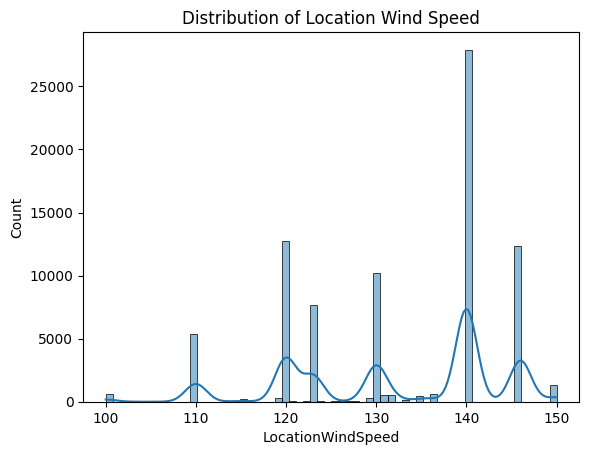

In [38]:
# Plotting distribution of LocationWindSpeed to see variance and relevance
sns.histplot(new_df['LocationWindSpeed'], kde=True)
plt.title('Distribution of Location Wind Speed')
plt.show()

In [39]:
new_df.head()

,AdjSquareFeet,DistancetoCoast,DistancetoSinkhole,DistancetoFireDepartment,LocationWindSpeed,Terrain,ValueofHome,NumberOfBuildings,NumberOfUnits,Age
0,1384.0,2956.8,NaN,1.20,129.0,B,200840.0,NaN,1.0,36.0
1,1534.0,-99.0,9.56,0.98,146.0,HVHZ,164994.0,1.0,1.0,20.0
2,2612.0,-99.0,0.82,0.05,120.0,B,200346.0,1.0,1.0,19.0
3,2848.0,-99.0,0.39,1.69,120.0,B,364161.0,1.0,1.0,40.0
4,1936.0,-99.0,1.09,1.37,120.0,B,138691.0,1.0,1.0,38.0


In [40]:
# check the number of missing values before data imputation
new_df.isnull().sum()


AdjSquareFeet                104
DistancetoCoast               52
DistancetoSinkhole           243
DistancetoFireDepartment      78
LocationWindSpeed             52
Terrain                       42
ValueofHome                   11
NumberOfBuildings           4551
NumberOfUnits                129
Age                           55
dtype: int64

In [41]:

# Drop rows where 'ValueofHome' is null
new_df = new_df.dropna(subset=['ValueofHome'])

new_df['ValueofHome'].isnull().sum()


0

In [42]:
import warnings
warnings.filterwarnings("ignore")

# Automatically select numeric and categorical columns
numerical_cols = new_df.select_dtypes(include=['number']).columns
categorical_cols = new_df.select_dtypes(include=['object', 'category']).columns

# Impute missing values
# For numerical columns: using median
for col in numerical_cols:
    new_df[col].fillna(new_df[col].median(), inplace=True)

# For categorical columns: using mode
for col in categorical_cols:
    new_df[col].fillna(new_df[col].mode()[0], inplace=True)

# check the number of missing values after data imputation
new_df.isnull().sum()


AdjSquareFeet               0
DistancetoCoast             0
DistancetoSinkhole          0
DistancetoFireDepartment    0
LocationWindSpeed           0
Terrain                     0
ValueofHome                 0
NumberOfBuildings           0
NumberOfUnits               0
Age                         0
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = new_df.drop('ValueofHome', axis=1)  # all columns except 'ValueofHome'
y = new_df['ValueofHome']               # only the 'ValueofHome' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print("Training dataset size:", X_train.shape)
print("Training labels size:", y_train.shape)

print("Testing dataset size:", X_test.shape)
print("Testing labels size:", y_test.shape)


Training dataset size: (65388, 9)
Training labels size: (65388,)
Testing dataset size: (16348, 9)
Testing labels size: (16348,)


In [45]:
# # Save DataFrame to a new CSV file
# new_df.to_csv('cleaned_data.csv', index=False)



In [3]:
import pandas as pd
cleaned_data = pd.read_csv("cleaned_data.csv")
cleaned_data.dtypes

AdjSquareFeet               float64
DistancetoCoast             float64
DistancetoSinkhole          float64
DistancetoFireDepartment    float64
LocationWindSpeed           float64
Terrain                      object
ValueofHome                 float64
NumberOfBuildings           float64
NumberOfUnits               float64
Age                         float64
dtype: object

In [75]:
# !pip install xgboost

# Step 1: Data Preparation

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load cleaned data
data = pd.read_csv('cleaned_data.csv')

# Encode categorical variables
encoder = OneHotEncoder()
encoded_terrain = encoder.fit_transform(data[['Terrain']]).toarray()
encoded_terrain_df = pd.DataFrame(encoded_terrain, columns=encoder.get_feature_names_out(['Terrain']))

# Concatenate encoded dataframe with the original dataframe
data = pd.concat([data.drop(['Terrain'], axis=1), encoded_terrain_df], axis=1)

# Split data into features and target
X = data.drop('ValueofHome', axis=1)
y = data['ValueofHome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training

In [6]:
import xgboost as xgb

# Create the XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Fit the model on training data
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Step 3: Model Evaluation

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 147566.96815246085


Step 4: Parameter Tuning (Optional)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)

grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
print(f"Best parameters: {best_parameters}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=5, n_e

In [9]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 0.5, 0]
}

# Setup the randomized search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=4, n_iter=50, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_cv.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", random_cv.best_params_)


Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


Advanced Feature Engineering

In [10]:
# Step 1: Identify Numeric Columns
# Select numeric columns only
X_numerical = cleaned_data.select_dtypes(include=[np.number])


In [12]:
# !pip install -U scikit-learn

In [76]:
X_numerical.head()

,AdjSquareFeet,DistancetoCoast,DistancetoSinkhole,DistancetoFireDepartment,LocationWindSpeed,ValueofHome,NumberOfBuildings,NumberOfUnits,Age
0,1384.0,2956.8,4.59,1.20,129.0,200840.0,1.0,1.0,36.0
1,1534.0,-99.0,9.56,0.98,146.0,164994.0,1.0,1.0,20.0
2,2612.0,-99.0,0.82,0.05,120.0,200346.0,1.0,1.0,19.0
3,2848.0,-99.0,0.39,1.69,120.0,364161.0,1.0,1.0,40.0
4,1936.0,-99.0,1.09,1.37,120.0,138691.0,1.0,1.0,38.0


In [14]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 'Terrain' is categorical column in the cleaned_data DataFrame
categorical_columns = ['Terrain']
data_categorical = cleaned_data[categorical_columns]

# Creating the OneHotEncoder instance
encoder = OneHotEncoder()

# Fitting the encoder and transforming the categorical data, specifying dense output
data_categorical_encoded = encoder.fit_transform(data_categorical).toarray()

# Convert the transformed data into a DataFrame
cleaned_data_categorical_encoded = pd.DataFrame(data_categorical_encoded, 
                                                columns=encoder.get_feature_names_out(categorical_columns))


In [15]:
# Step 2: Apply Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# DataFrame 'X_numerical' with only numeric columns
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_numerical)

# Convert the array back to a DataFrame with appropriate feature names
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_numerical.columns))


In [16]:
# Concatenate the polynomial features with the encoded categorical data
X_final = pd.concat([X_poly_df, cleaned_data_categorical_encoded], axis=1)


In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_numerical)  # X_numerical would be dataframe with only numerical columns


In [26]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Split the data into training and testing sets
X = pd.concat([X_poly_df, cleaned_data_categorical_encoded], axis=1)
y = cleaned_data['ValueofHome']  # our target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=7, learning_rate=0.2)
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# `y_pred` are our model's predictions and `y_test` are the actual target values
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


# Step 4: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


RMSE: 79242.3052515865
R² Score: 0.8948900386486274
RMSE: 79242.3052515865
MAE: 2025.8201953280313
R² Score: 0.8948900386486274


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


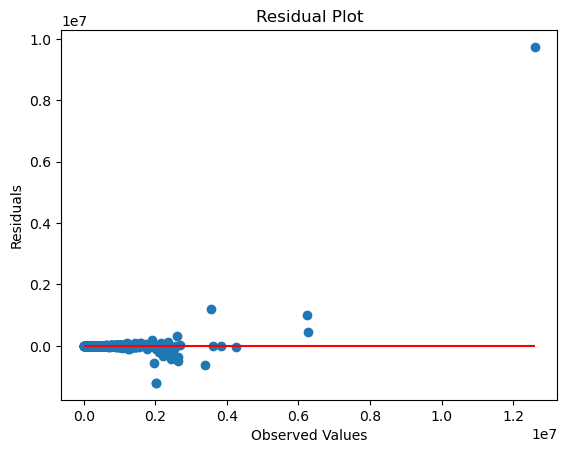

In [31]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


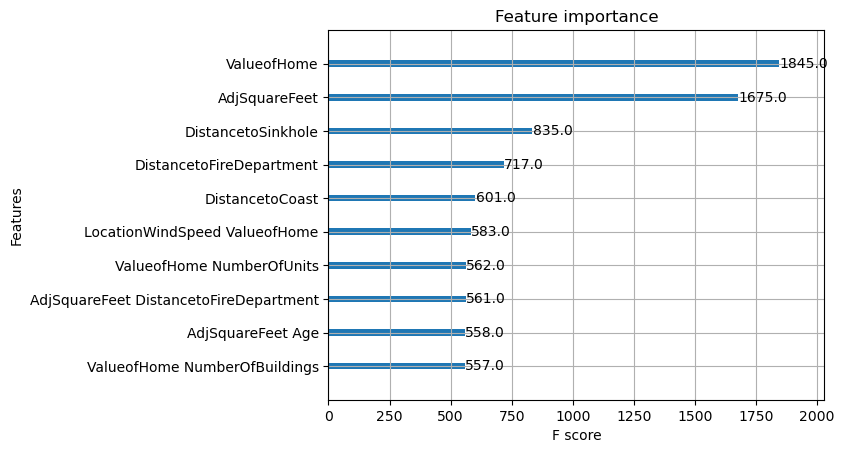

In [32]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10) # top 10 features
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_final, y, scoring='neg_mean_squared_error', cv=5)
print("Mean Squared Error:", -scores.mean())


Mean Squared Error: 3869605399.5516996


In [35]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    # Split your data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Suggest values for the hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    }
    
    # Create and train the model
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    
    # Predict and calculate the error
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    
    return rmse


In [ ]:
# !pip install optuna

In [36]:
import optuna

# Create a study object
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print best parameters
print('Best parameters:', study.best_trial.params)


[I 2024-06-12 10:08:19,144] A new study created in memory with name: no-name-72d25b43-6d15-4884-9e93-c63d81cb8b1e
/tmp/ipykernel_23271/2186420077.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.2),
/tmp/ipykernel_23271/2186420077.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipykernel_23271/2186420077.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
/op

Best parameters: {'n_estimators': 237, 'max_depth': 9, 'learning_rate': 0.19306367047138936, 'subsample': 0.6840974616225881, 'colsample_bytree': 0.8645983991301097}


In [37]:
cleaned_data.shape

(81736, 10)

In [38]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    
    # Save additional metrics in the trial's user attributes
    trial.set_user_attr('r2', r2)
    
    return rmse

# When retrieving results
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print('Best parameters:', study.best_trial.params)
print('Best RMSE:', study.best_trial.value)
print('Best R^2:', study.best_trial.user_attrs['r2'])


[I 2024-06-12 10:34:47,821] A new study created in memory with name: no-name-420a3bcf-abb2-40f0-becf-fb03022575dd
/tmp/ipykernel_23271/3541502941.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_23271/3541502941.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipykernel_23271/3541502941.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/opt/

Best parameters: {'n_estimators': 614, 'max_depth': 3, 'learning_rate': 0.4852412575497546, 'subsample': 0.7172534199452782, 'colsample_bytree': 0.7732947868167498}
Best RMSE: 66958.34401608602
Best R^2: 0.9249520069548572


In [39]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Save the model to disk
joblib.dump(model, 'random_forest_model.joblib')

# Load the model from disk
loaded_model = joblib.load('random_forest_model.joblib')

# Make predictions to test if it works
predictions = loaded_model.predict(X_test)

# Calculate and print the R^2 score to see model performance
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')


R^2 Score: 0.9553215170393806


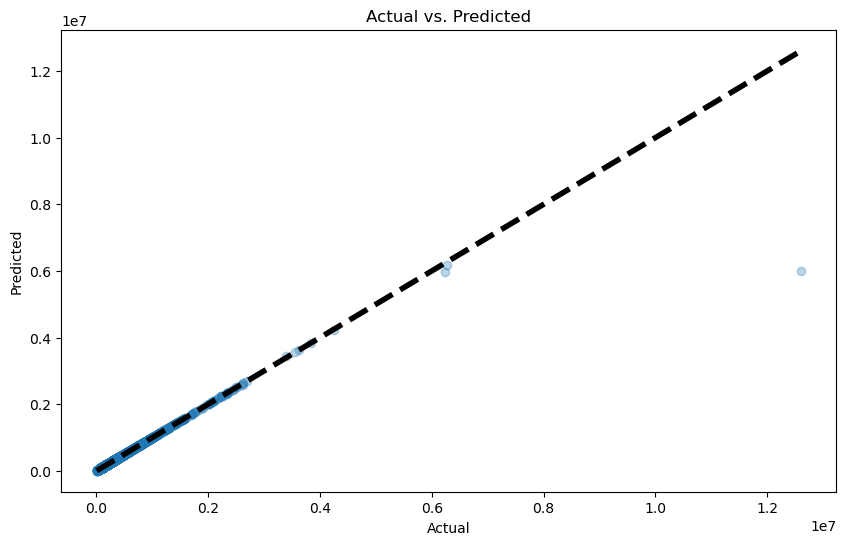

In [40]:
# Comparing Predictions
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [77]:
# save model
import joblib

# Save the model
joblib.dump(model, 'xgb_regressor_model.joblib')

# Load the model
loaded_model = joblib.load('xgb_regressor_model.joblib')


/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [65]:
if 'Terrain' in cleaned_data.columns:
    # Get one-hot encoded features
    terrain_dummies = pd.get_dummies(cleaned_data['Terrain'], prefix='Terrain')
    cleaned_data = pd.concat([cleaned_data.drop('Terrain', axis=1), terrain_dummies], axis=1)


In [66]:
X = cleaned_data.drop('ValueofHome', axis=1)
y = cleaned_data['ValueofHome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, RegressorMixin
import lightgbm as lgb

# Custom wrapper for KerasRegressor due to deprecated scikit_learn wrapper in tensorflow.keras
class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn=None, epochs=100, batch_size=10, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None

    def fit(self, X, y):
        self.model_ = self.build_fn(X.shape[1])  # number of features
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

    def score(self, X, y):
        predictions = self.predict(X)
        return np.sqrt(mean_squared_error(y, predictions))

# Function to create a simple neural network, correctly accepting input_dim
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the data
X = cleaned_data.drop('ValueofHome', axis=1)
y = cleaned_data['ValueofHome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Machine': GradientBoostingRegressor(n_estimators=100),
    'LightGBM': lgb.LGBMRegressor(),
    'Support Vector Machine': SVR(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Neural Network': KerasRegressor(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
}

# Training and Evaluating Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    results[name] = rmse
    print(f"{name} RMSE: {rmse}")

# Adding cross-validation to assess model performance
for name, model in models.items():
    if name != 'Neural Network':  # Exclude NN for simplicity in CV
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        avg_rmse = np.mean(np.sqrt(-scores))
        print(f"{name} Cross-Validated RMSE: {avg_rmse}")


Random Forest RMSE: 136606.90047386335
Gradient Boosting Machine RMSE: 160336.13591660658
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 65388, number of used features: 11
[LightGBM] [Info] Start training from score 243828.086438
LightGBM RMSE: 139089.89452063435
Support Vector Machine RMSE: 250019.97378264804
Ridge Regression RMSE: 199878.55228132327


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network RMSE: 201692.24590744043
Random Forest Cross-Validated RMSE: 130934.18695640421
Gradient Boosting Machine Cross-Validated RMSE: 142952.01273684012
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 65388, number of used features: 11
[LightGBM] [Info] Start training from score 252545.088671
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [70]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a custom Scikit-Learn wrapper for Keras
class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, epochs=100, batch_size=10, optimizer='adam'):
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
    
    def build_model(self):
        model = Sequential()
        model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mean_squared_error', optimizer=self.optimizer)
        return model
    
    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
    
    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        from sklearn.metrics import r2_score
        predictions = self.predict(X)
        return r2_score(y, predictions)


In [72]:
# Create instance of the custom Keras Regressor
neural_network = KerasRegressor(epochs=50, batch_size=10, optimizer=Adam())

# Add to models dictionary
models['Neural Network'] = neural_network

# Now you can fit, predict, and score using scikit-learn style calls
models['Neural Network'].fit(X_train, y_train)
predictions = models['Neural Network'].predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Neural Network RMSE: {rmse}")


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step
Neural Network RMSE: 186099.9568272517


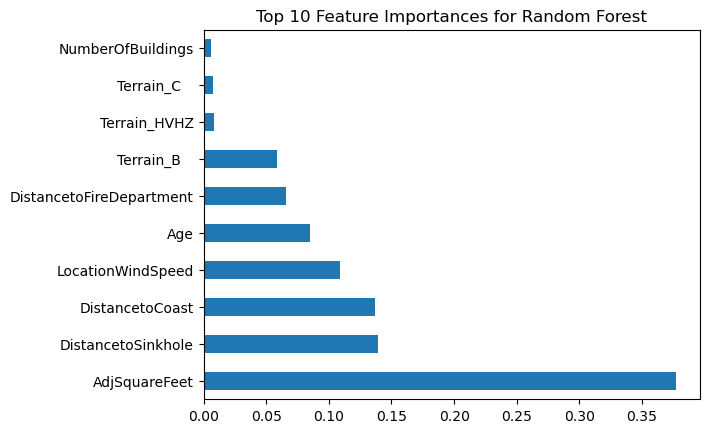

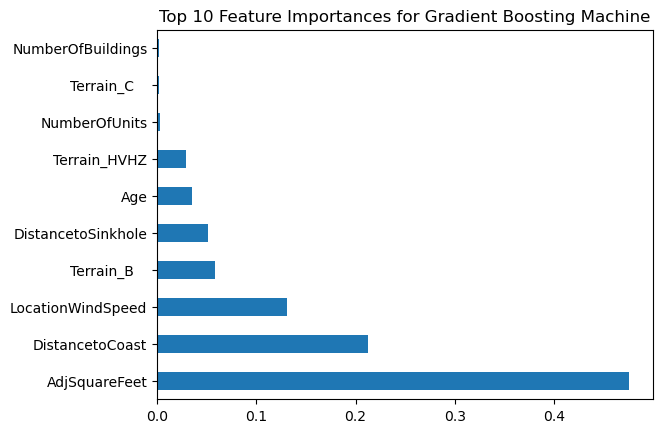

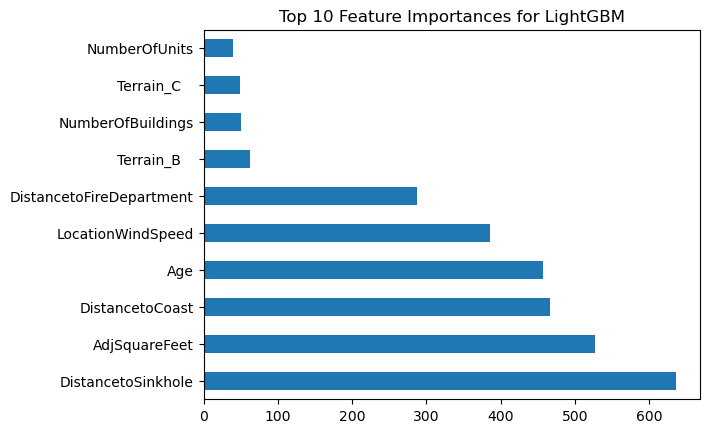

In [74]:
import matplotlib.pyplot as plt

# 'models' is our dictionary containing different types of models
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):  # Check if the model has 'feature_importances_' attribute
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        feature_importances.nlargest(10).plot(kind='barh')
        plt.title(f'Top 10 Feature Importances for {name}')
        plt.show()


In [ ]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>